# Recipe2Cuisine

You've just joined the data team at an online publishing company. One of your verticals is a food publication. A product manager on your team wants to build a feature for this vertical that enables users to query by cuisine, not just by ingredients. Most of your recipes are unlabeled, and it's infeasible to label them by hand. Luckily, you have a small training set of about 10,000 recipes with labeled cuisines.

Design and execute a method to predict the cuisine of a recipe given only its ingredients. How could you design this to be robust enough to understand similarities / substitutions between ingredients? For each each major cuisine, what are the driving ingredients that characterize it?

Your product manager indicates a likelihood that you will only need to write a guideline for an outsourced team to hand label the remaining corpus. How would you go about writing this guide for a few major cuisines?


## EDA

First, I will do some EDA. Specifically, I will look at the distribution of cuisines and ingredients. Are there certain ingredients that occur frequently within each cuisine?

In [1]:
import pandas as pd
import numpy as np

In [48]:
df = pd.read_json('recipies.json')
df.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

[Text(0, 0, 'italian'),
 Text(0, 0, 'mexican'),
 Text(0, 0, 'southern_us'),
 Text(0, 0, 'indian'),
 Text(0, 0, 'chinese'),
 Text(0, 0, 'french'),
 Text(0, 0, 'cajun_creole'),
 Text(0, 0, 'thai'),
 Text(0, 0, 'japanese'),
 Text(0, 0, 'greek'),
 Text(0, 0, 'spanish'),
 Text(0, 0, 'korean'),
 Text(0, 0, 'vietnamese'),
 Text(0, 0, 'moroccan'),
 Text(0, 0, 'british'),
 Text(0, 0, 'filipino'),
 Text(0, 0, 'irish'),
 Text(0, 0, 'jamaican'),
 Text(0, 0, 'russian'),
 Text(0, 0, 'brazilian')]

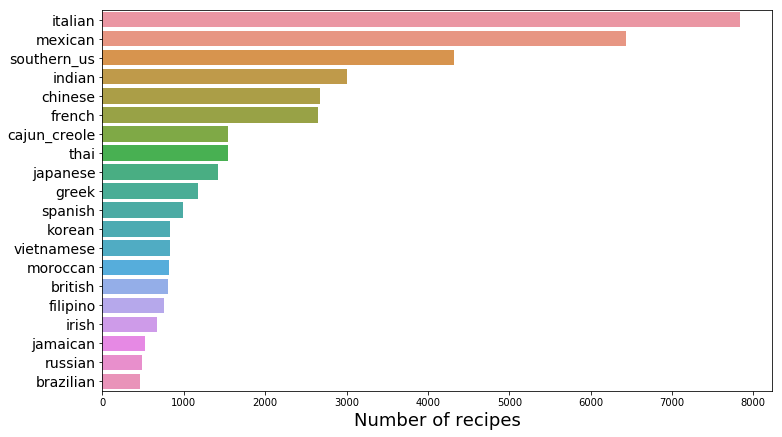

In [55]:
cuisine_distribution = df.groupby('cuisine').count()
cuisine_distribution.reset_index(inplace=True)
fig,ax = plt.subplots(figsize=(12,7))
ind = np.argsort(cuisine_distribution.ingredients)[::-1]
sns.barplot(y = cuisine_distribution.cuisine[ind],x = cuisine_distribution.ingredients[ind])
ax.set_ylabel('')
ax.set_xlabel('Number of recipes',fontsize=18)
ax.set_yticklabels(labels=cuisine_distribution.cuisine[ind],fontsize=14)


It looks like there are a few cuisines (e.g. Italian, Mexican, Southern), that show up at a higher frequency in the recipe dataset. Within these cuisines, are there specific ingredients that are common?

[Text(0, 0, 'salt'),
 Text(0, 0, 'olive oil'),
 Text(0, 0, 'garlic cloves'),
 Text(0, 0, 'grated parmesan cheese'),
 Text(0, 0, 'garlic'),
 Text(0, 0, 'ground black pepper'),
 Text(0, 0, 'extra-virgin olive oil'),
 Text(0, 0, 'onions'),
 Text(0, 0, 'water'),
 Text(0, 0, 'butter'),
 Text(0, 0, 'pepper'),
 Text(0, 0, 'all-purpose flour'),
 Text(0, 0, 'fresh basil'),
 Text(0, 0, 'sugar'),
 Text(0, 0, 'dry white wine'),
 Text(0, 0, 'kosher salt'),
 Text(0, 0, 'black pepper'),
 Text(0, 0, 'fresh parsley'),
 Text(0, 0, 'eggs'),
 Text(0, 0, 'dried oregano')]

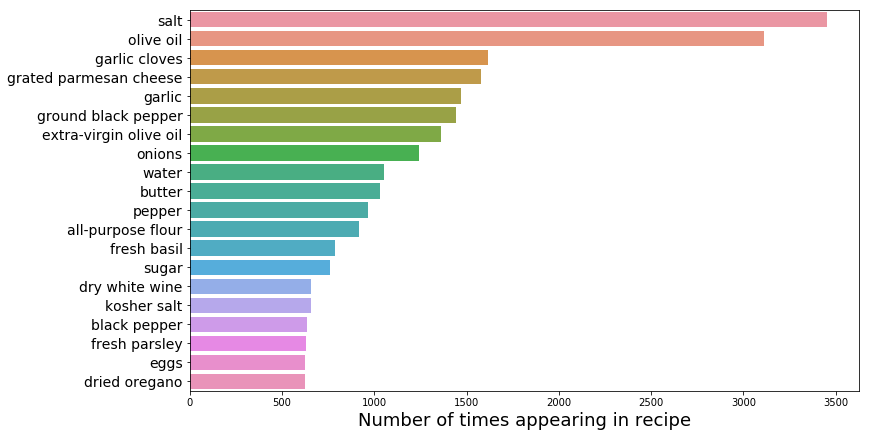

In [56]:
italian_ingredients = []
for list in df.ingredients[df.cuisine=='italian']:
    for ingredient in list:
        italian_ingredients.append(ingredient)

italian_ingredients = pd.DataFrame(italian_ingredients,columns = ['ingredients'])
italian_ingredients['num'] = np.ones(len(italian_ingredients))
italian_ingredients_distribution = italian_ingredients.groupby('ingredients')['num'].count().reset_index()
italian_ingredients_distribution.sort_values('num', ascending=False, inplace=True)

fig,ax = plt.subplots(figsize=(12,7))
sns.barplot(y = italian_ingredients_distribution.ingredients[0:20],x = italian_ingredients_distribution.num[0:20])
ax.set_ylabel('')
ax.set_xlabel('Number of times appearing in recipe',fontsize=18)
ax.set_yticklabels(labels=italian_ingredients_distribution.ingredients[0:20],fontsize=14)


[Text(0, 0, 'salt'),
 Text(0, 0, 'onions'),
 Text(0, 0, 'ground cumin'),
 Text(0, 0, 'garlic'),
 Text(0, 0, 'olive oil'),
 Text(0, 0, 'chili powder'),
 Text(0, 0, 'jalapeno chilies'),
 Text(0, 0, 'sour cream'),
 Text(0, 0, 'avocado'),
 Text(0, 0, 'corn tortillas'),
 Text(0, 0, 'salsa'),
 Text(0, 0, 'garlic cloves'),
 Text(0, 0, 'water'),
 Text(0, 0, 'chopped cilantro fresh'),
 Text(0, 0, 'tomatoes'),
 Text(0, 0, 'flour tortillas'),
 Text(0, 0, 'black beans'),
 Text(0, 0, 'pepper'),
 Text(0, 0, 'vegetable oil'),
 Text(0, 0, 'lime')]

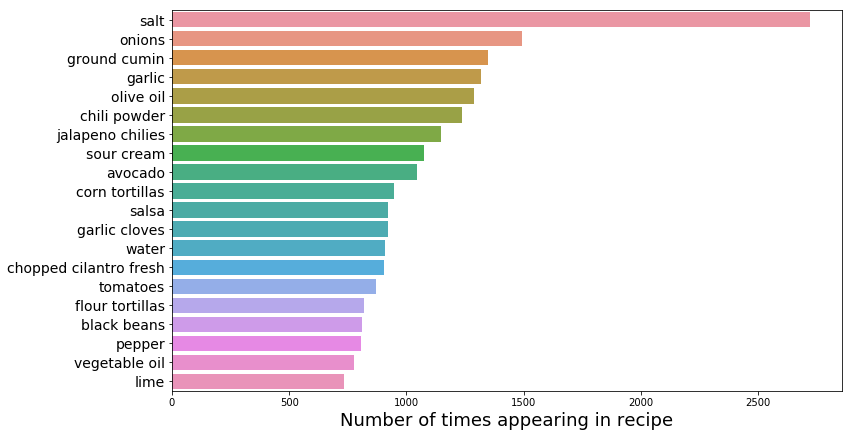

In [57]:
mexican_ingredients = []
for list in df.ingredients[df.cuisine=='mexican']:
    for ingredient in list:
        mexican_ingredients.append(ingredient)

mexican_ingredients = pd.DataFrame(mexican_ingredients,columns = ['ingredients'])
mexican_ingredients['num'] = np.ones(len(mexican_ingredients))
mexican_ingredients_distribution = mexican_ingredients.groupby('ingredients')['num'].count().reset_index()
mexican_ingredients_distribution.sort_values('num', ascending=False, inplace=True)

fig,ax = plt.subplots(figsize=(12,7))
sns.barplot(y = mexican_ingredients_distribution.ingredients[0:20],x = mexican_ingredients_distribution.num[0:20])
ax.set_ylabel('')
ax.set_xlabel('Number of times appearing in recipe',fontsize=18)
ax.set_yticklabels(labels=mexican_ingredients_distribution.ingredients[0:20],fontsize=14)


[Text(0, 0, 'salt'),
 Text(0, 0, 'butter'),
 Text(0, 0, 'all-purpose flour'),
 Text(0, 0, 'sugar'),
 Text(0, 0, 'large eggs'),
 Text(0, 0, 'baking powder'),
 Text(0, 0, 'water'),
 Text(0, 0, 'unsalted butter'),
 Text(0, 0, 'milk'),
 Text(0, 0, 'buttermilk'),
 Text(0, 0, 'eggs'),
 Text(0, 0, 'pepper'),
 Text(0, 0, 'onions'),
 Text(0, 0, 'ground black pepper'),
 Text(0, 0, 'vanilla extract'),
 Text(0, 0, 'vegetable oil'),
 Text(0, 0, 'baking soda'),
 Text(0, 0, 'kosher salt'),
 Text(0, 0, 'olive oil'),
 Text(0, 0, 'garlic cloves')]

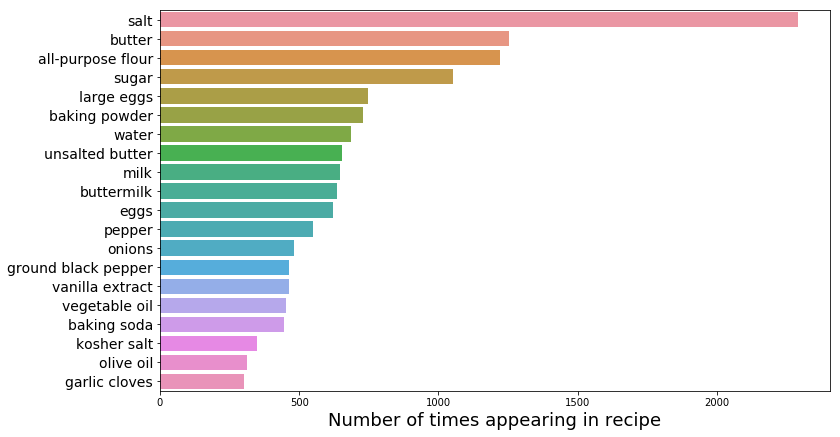

In [58]:
southern_us_ingredients = []
for list in df.ingredients[df.cuisine=='southern_us']:
    for ingredient in list:
        southern_us_ingredients.append(ingredient)

southern_us_ingredients = pd.DataFrame(southern_us_ingredients,columns = ['ingredients'])
southern_us_ingredients['num'] = np.ones(len(southern_us_ingredients))
southern_us_ingredients_distribution = southern_us_ingredients.groupby('ingredients')['num'].count().reset_index()
southern_us_ingredients_distribution.sort_values('num', ascending=False, inplace=True)

fig,ax = plt.subplots(figsize=(12,7))
sns.barplot(y = southern_us_ingredients_distribution.ingredients[0:20],x = southern_us_ingredients_distribution.num[0:20])
ax.set_ylabel('')
ax.set_xlabel('Number of times appearing in recipe',fontsize=18)
ax.set_yticklabels(labels=southern_us_ingredients_distribution.ingredients[0:20],fontsize=14)


There are definitely some differences in commonly used ingredients between different cuisines. For example, Italian food often has olive oil, parmesan, and garlic, Mexican food has onions, cumin, sour cream, and avocadoes, and Southern food has butter, flour, sugar, and buttermilk. 

However, there are also some ingredients that occur in all cuisines. For example, salt and water are likely to be in recipes from any cuisine and consequently won't be very helpful when trying to predict what cuisine a recipe falls into! I need to find a way to identify ingredients that are more likely to occur in a specific cuisine. 

To do this, I can calculate a TF-IDF matrix, which will allow us to identify ingredients that are not common overall but show up a lot in one cuisine. Calculating this for individual recipes wont be so helpful, but I can calculate it where each cuisine is a row in order to find useful ingredients.

In [8]:
df_cuisines = pd.DataFrame(columns=['cuisine','ingredients'])
df_cuisines.cuisine = df.cuisine.unique()
for ind,cuisine in enumerate(df_cuisines.cuisine):
    ing_string = ''
    for ingredients in df.ingredients[df.cuisine==cuisine]:
        for ingredient in ingredients:
            ing_string = ing_string + ingredient + ' '
    df_cuisines.loc[ind,'ingredients'] = ing_string
    
df_cuisines

,cuisine,ingredients
0,greek,romaine lettuce black olives grape tomatoes ga...
1,southern_us,plain flour ground pepper salt tomatoes ground...
2,filipino,eggs pepper salt mayonaise cooking oil green c...
3,indian,water vegetable oil wheat salt black pepper sh...
4,jamaican,plain flour sugar butter eggs fresh ginger roo...
5,spanish,olive oil salt medium shrimp pepper garlic cho...
6,italian,sugar pistachio nuts white almond bark flour v...
7,mexican,olive oil purple onion fresh pineapple pork po...
8,chinese,low sodium soy sauce fresh ginger dry mustard ...
9,british,greek yogurt lemon curd confectioners sugar ra...


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = df_cuisines.ingredients.values
vectorizer = TfidfVectorizer(max_features=2000,max_df=0.5)
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.shape)

['10', '100', '14', '15', '25', '33', '40', '43', '95', '96', 'abalone', 'abbamele', 'absinthe', 'abura', 'acai', 'accent', 'accompaniment', 'achiote', 'acid', 'acini', 'ackee', 'acorn', 'acting', 'activ', 'added', 'adzuki', 'agar', 'age', 'aged', 'ahi', 'aioli', 'ajinomoto', 'ajwain', 'aka', 'alaskan', 'albacore', 'alcohol', 'aleppo', 'alexia', 'alfalfa', 'alfredo', 'almondmilk', 'aloe', 'alphabet', 'alum', 'amaranth', 'amarena', 'amaretti', 'amaretto', 'amba', 'amber', 'amberjack', 'amchur', 'america', 'american', 'aminos', 'ammonium', 'amontillado', 'ampalaya', 'an', 'anaheim', 'anasazi', 'anchovies', 'andouille', 'anejo', 'anglaise', 'angled', 'angostura', 'angus', 'anisette', 'anjou', 'annatto', 'any', 'aonori', 'applewood', 'aquavit', 'arak', 'arame', 'arbol', 'arborio', 'arctic', 'arepa', 'argo', 'arhar', 'armagnac', 'arrabbiata', 'arrow', 'artichok', 'artichoke', 'artichokes', 'artificial', 'artisan', 'asada', 'asadero', 'asafetida', 'asafoetida', 'asakusa', 'ascorbic', 'asiago

In [10]:
df_top_ings = pd.DataFrame(pd.DataFrame(columns=['cuisine','ingredients']))
df_top_ings.cuisine = df.cuisine.unique()

for ind in df_top_ings.index:
    feature_array = np.array(vectorizer.get_feature_names())
    tfidf_sorting = np.argsort(X[ind].toarray()).flatten()[::-1]

    n = 20
    top_n = feature_array[tfidf_sorting][:n]
    df_top_ings.loc[ind,'ingredients'] = top_n
    
df_top_ings

,cuisine,ingredients
0,greek,"[kalamata, pita, pitas, tahini, rounds, hummus..."
1,southern_us,"[grits, whiskey, bourbon, collard, eyed, quick..."
2,filipino,"[calamansi, lumpia, thai, glutinous, choy, bok..."
3,indian,"[garam, dal, ghee, fenugreek, paneer, asafoeti..."
4,jamaican,"[jerk, jamaican, bonnet, scotch, season, haban..."
5,spanish,"[chorizo, manchego, arborio, pimento, stuffed,..."
6,italian,"[lasagna, parmigiano, part, arborio, prosciutt..."
7,mexican,"[taco, enchilada, mexican, refried, tortilla, ..."
8,chinese,"[chinese, shaoxing, hoisin, five, szechwan, be..."
9,british,"[stilton, suet, currants, drippings, raspberry..."


In [59]:
df_top_ings.ingredients[6][0:10]

array(['lasagna', 'parmigiano', 'part', 'arborio', 'prosciutto',
       'marinara', 'romano', 'pecorino', 'pesto', 'provolone'],
      dtype='<U15')

In [60]:
df_top_ings.ingredients[7][0:10]

array(['taco', 'enchilada', 'mexican', 'refried', 'tortilla',
       'tomatillos', 'poblano', 'guacamole', 'queso', 'cotija'],
      dtype='<U15')

In [61]:
df_top_ings.ingredients[1][0:10]

array(['grits', 'whiskey', 'bourbon', 'collard', 'eyed', 'quickcooking',
       'pecan', 'cajun', 'biscuits', 'barbecue'], dtype='<U15')

Once I've applied the TF-IDF transformation to the ingredients in each cuisine, the differences between the cuisines are even more clear. Now there is no overlap in the top 20 ingredients between Italian and Mexican cuisines, even though there was significant overlap between the raw ingredient lists.

If I were writing a guideline for an outsourced team to hand label the remaining corpus, I could provide this list of top ingredients in each cuisine in order to guide their labeling.

In [13]:
ing_list = []
for ingredients in df_top_ings.ingredients:
    for ingredient in ingredients:
        ing_list.append(ingredient)
        
print('Total ingredients in top 20 for each cuisine: ',len(ing_list))
print('Total unique ingredients in top 20 for each cuisine: ',len(np.unique(ing_list)))

Total ingredients in top 20 for each cuisine:  400
Total unique ingredients in top 20 for each cuisine:  311


In [14]:
ing_list = []
for ingredients in df_top_ings.ingredients:
    for ingredient in ingredients[0:10]:
        ing_list.append(ingredient)
        
print('Total ingredients in top 20 for each cuisine: ',len(ing_list))
print('Total unique ingredients in top 20 for each cuisine: ',len(np.unique(ing_list)))

Total ingredients in top 20 for each cuisine:  200
Total unique ingredients in top 20 for each cuisine:  174


Of the 400 total ingredients that make up the top 20 for each cuisine, 311 of these are unique (or 174/200 for the top 10), so the presence of any of these ingredients in a recipe is likely to point to the correct cuisine!

## Now I'll do some simple modeling

I first need to calculate either a bag-of-words or TF-IDF matrix to use in my classifier. I'll just go straight to the TF-IDF matrix:

In [15]:
corpus = []
for ingredients in df.ingredients:
    ing_list = ''
    for ingredient in ingredients:
        ing_list = ing_list + ingredient + ' '
    corpus.append(ing_list)
    
vectorizer = TfidfVectorizer(max_features=3000,max_df=0.5)
X = vectorizer.fit_transform(corpus)
print(X.shape)
X = X.toarray()


(39774, 3000)


In [16]:
df.cuisine = pd.Categorical(df.cuisine)
df['cuisine_label'] = df.cuisine.cat.codes.values
y = df.cuisine.cat.codes.values
y_labels = df.cuisine.cat.categories

I will first try a very simple model - a Gaussian Naive Bayes Classifier

In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

gnb = GaussianNB()
gnb.fit(X_train,y_train)
print('Accuracy on training data: ',gnb.score(X_train,y_train))
print('Accuracy on test data: ',gnb.score(X_test,y_test))

Accuracy on training data:  0.32056318551808666
Accuracy on test data:  0.24211187932118164


Confusion matrix, without normalization


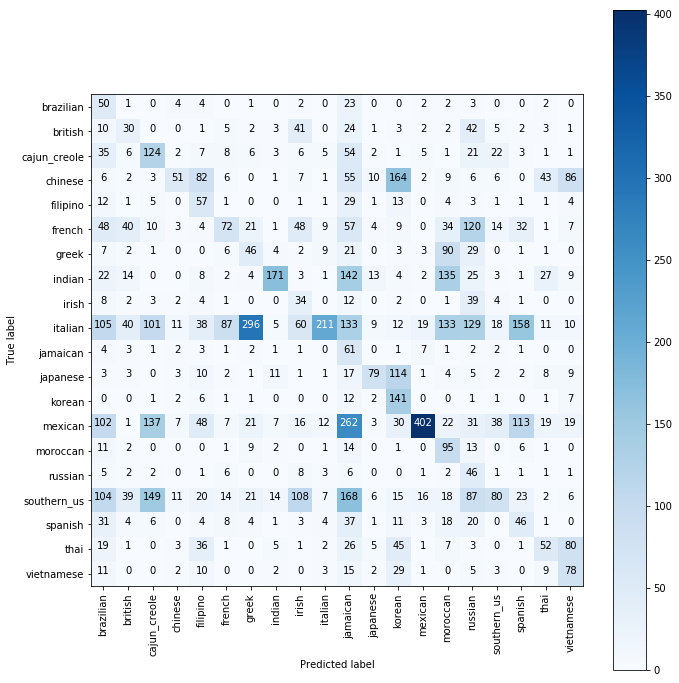

In [148]:
from sklearn.metrics import confusion_matrix
import itertools

y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, classes=y_labels, normalize=False)
plt.show()

Normalized confusion matrix


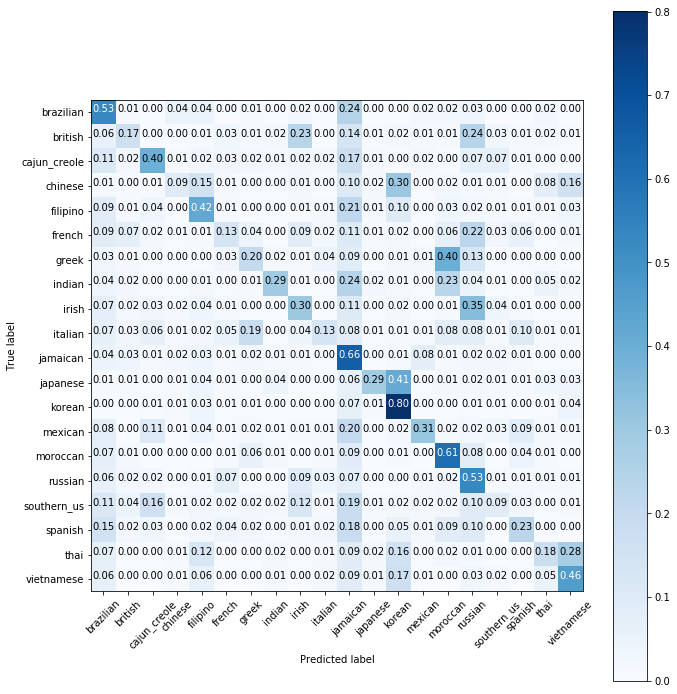

In [19]:
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, classes=y_labels, normalize=True)
plt.show()

Now I'll try the same model but just with a bow matrix:

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_features=2000,max_df=0.5)
X_count = count_vectorizer.fit_transform(corpus)
print(X.shape)
X_count = X_count.toarray()

(39774, 3000)


In [21]:
X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(X_count, y, test_size = 0.2)

gnb_count = GaussianNB()
gnb_count.fit(X_train_count,y_train_count)
print('Accuracy on training data: ',gnb_count.score(X_train_count,y_train_count))
print('Accuracy on test data: ',gnb_count.score(X_test_count,y_test_count))


Accuracy on training data:  0.30117225557057103
Accuracy on test data:  0.24412319296040227


Confusion matrix, without normalization


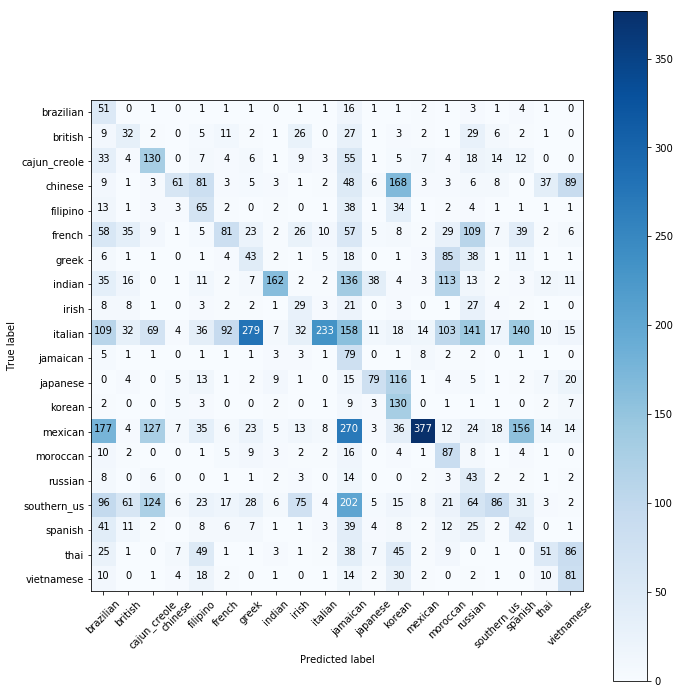

In [23]:
y_pred_count = gnb_count.predict(X_test_count)
cm_cv = confusion_matrix(y_test_count,y_pred_count)

plt.figure(figsize=(10,10))
plot_confusion_matrix(cm_cv, classes=y_labels, normalize=False)
plt.show()

That has a similar accuracy as using the TF-IDF matrix, so I will stick with TF-IDF! 

In [24]:
X = vectorizer.fit_transform(corpus)
print(X.shape)
X = X.toarray()

(39774, 3000)


One way that I could account for similarities and substitutions between ingredients is by training a word2vec model on all the ingredients in the dataset. I could then calculate a recipe vector from the average of the word vectors, and use that as a feature as well. Recipes with different ingredients that can substitute for each other should have similar vector embeddings, and this might improve the prediction.

In [25]:
import gensim

w2v = gensim.models.Word2Vec(
        df.ingredients.values,
        size=150,
        window=30,
        min_count=1,
        workers=10)
w2v.train(df.ingredients.values, total_examples=len(df.ingredients.values), epochs=10)

print(len(w2v.wv.vocab))


6714


In [26]:
w2v.wv.most_similar(positive='garlic')

[('minced garlic', 0.8619658946990967),
 ('garlic cloves', 0.8069359064102173),
 ('chopped garlic', 0.7982699871063232),
 ('crushed garlic', 0.7048181295394897),
 ('large garlic cloves', 0.6887021064758301),
 ('garlic puree', 0.5056877136230469),
 ('clove garlic, fine chop', 0.504534125328064),
 ('garlic powder', 0.46947526931762695),
 ('roasted garlic', 0.4611283540725708),
 ('squash', 0.4175143241882324)]

In [27]:
w2v.wv.most_similar(positive='yellow corn meal')

[('cornmeal', 0.8410243988037109),
 ('white cornmeal', 0.7736024856567383),
 ('stone-ground cornmeal', 0.6534618139266968),
 ('saltines', 0.607382595539093),
 ('self-rising cornmeal', 0.6028713583946228),
 ('quickcooking grits', 0.5902442932128906),
 ('catfish fillets', 0.5886045098304749),
 ('all purpose unbleached flour', 0.5649878978729248),
 ('Bisquick Original All-Purpose Baking Mix', 0.5631225109100342),
 ('cornbread', 0.5535959005355835)]

In [28]:
w2v.wv.most_similar(positive='ground nutmeg')

[('grated nutmeg', 0.5813702344894409),
 ('ground allspice', 0.5763945579528809),
 ('dried sage', 0.5204343795776367),
 ('fines herbes', 0.5133041739463806),
 ('ground sage', 0.5060058832168579),
 ('margarine', 0.49761372804641724),
 ('ground cloves', 0.4957400858402252),
 ('solid pack pumpkin', 0.49398794770240784),
 ('rubbed sage', 0.48708295822143555),
 ('veal', 0.4744499921798706)]

The vector embeddings are definitely similar for similar words! Now I will calculate an average vector embedding for each recipe, and include that as a feature in the model

In [29]:
recipe_vectors = []
for ingredients in df.ingredients:
    avvec = np.mean(w2v[ingredients], axis=0)
    recipe_vectors.append(avvec)
    

/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
X_vecs = np.asarray(recipe_vectors)
X_vecs.shape

(39774, 150)

In [31]:
X2 = np.concatenate((X,X_vecs),axis=1)
X2.shape

(39774, 3150)

In [32]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size = 0.2)

gnb2 = GaussianNB()
gnb2.fit(X_train2,y_train2)
print('Accuracy on training data: ',gnb2.score(X_train2,y_train2))
print('Accuracy on test data: ',gnb2.score(X_test2,y_test2))

Accuracy on training data:  0.33894842704044753
Accuracy on test data:  0.2526712759270899


Confusion matrix, without normalization


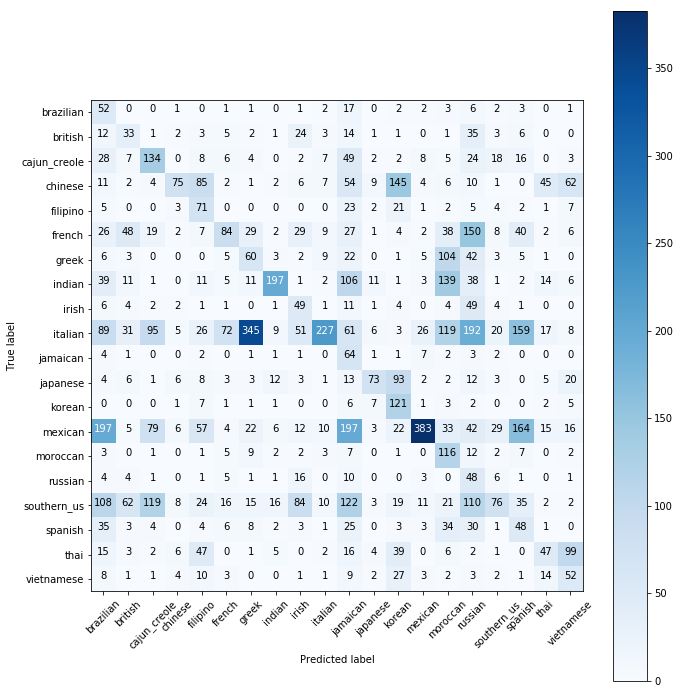

In [33]:
y_pred2 = gnb2.predict(X_test2)
cm = confusion_matrix(y_test2,y_pred2)

plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, classes=y_labels, normalize=False)
plt.show()

Adding the vector embeddings doesn't actually improve the model accuracy very much. Now I will start to try more complicated models. First, I'll try a random forest model without the vector  embeddings.

Accuracy on training data:  0.9994657280241365
Accuracy on test data:  0.7470773098680076
Confusion matrix, without normalization


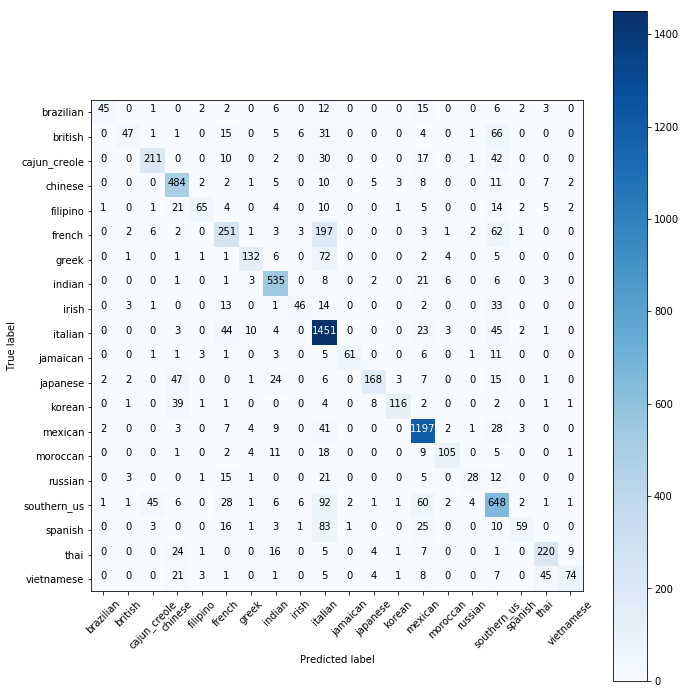

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,class_weight='balanced')
rf.fit(X_train,y_train)

print('Accuracy on training data: ',rf.score(X_train,y_train))
print('Accuracy on test data: ',rf.score(X_test,y_test))

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, classes=y_labels, normalize=False)
plt.show()

That's definitely better than the Gaussian Naive Bayes Classifier! What if I also include the vector embeddings?

Accuracy on training data:  0.9997485778937113
Accuracy on test data:  0.7020741671904462
Confusion matrix, without normalization


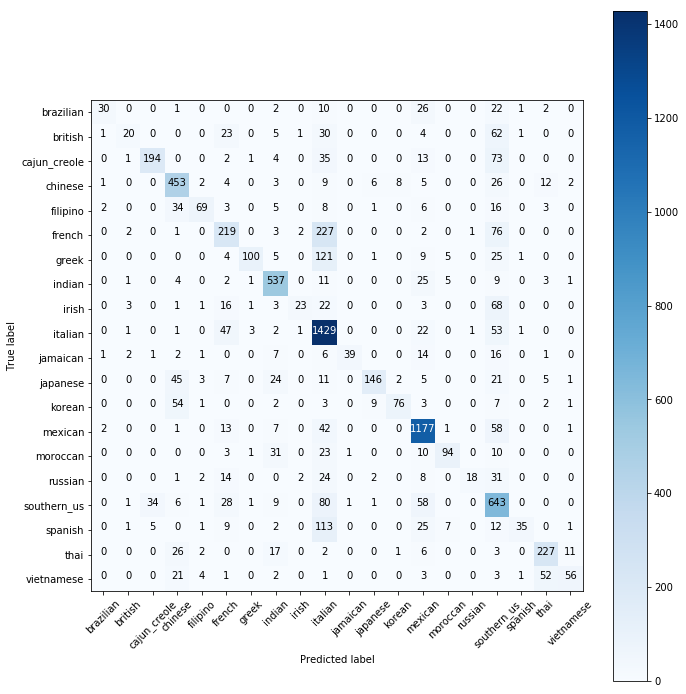

In [37]:
rf2 = RandomForestClassifier(n_estimators=100,class_weight='balanced')
rf2.fit(X_train2,y_train2)

print('Accuracy on training data: ',rf2.score(X_train2,y_train2))
print('Accuracy on test data: ',rf2.score(X_test2,y_test2))

y_pred2 = rf2.predict(X_test2)
cm = confusion_matrix(y_test2,y_pred2)

plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, classes=y_labels, normalize=False)
plt.show()

The training data is currently being overfit, since the accuracy on the training set is much higher than the test set accuracy. I will perform 5-fold cross-validation in order to assess parameters like the max depth or max number of leaves for the trees.

In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':  [40,60,100],
            'n_estimators': [200,300,500]}

grid = GridSearchCV(RandomForestClassifier(),param_grid,cv=5,
                    verbose=2,n_jobs=4,return_train_score=True)
grid.fit(X_train2, y_train2)

print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 17.1min
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed: 24.5min finished


{'max_depth': 100, 'n_estimators': 500}
0.7033219145793393


Accuracy on training data:  0.9997485778937113
Accuracy on test data:  0.709365179132621
Confusion matrix, without normalization


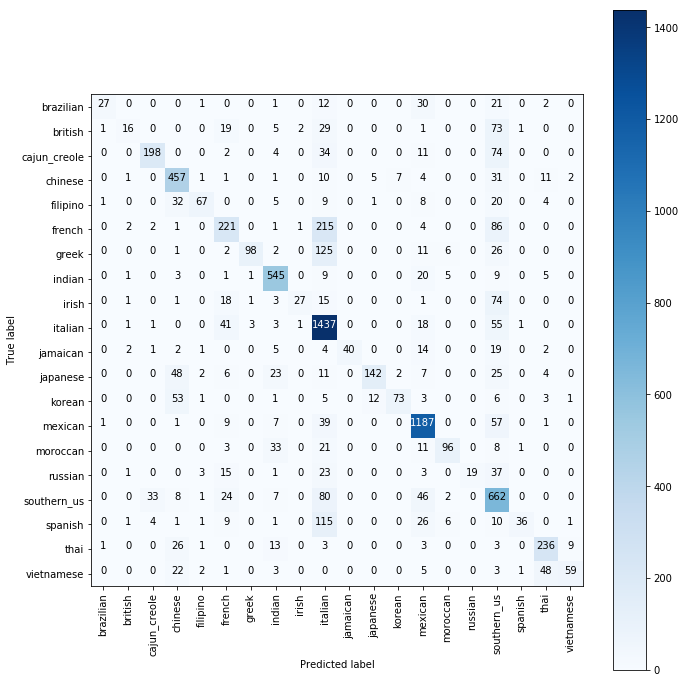

In [149]:
rf2 = RandomForestClassifier(n_estimators=1000,class_weight='balanced',
                            max_features='auto')
rf2.fit(X_train2,y_train2)

print('Accuracy on training data: ',rf2.score(X_train2,y_train2))
print('Accuracy on test data: ',rf2.score(X_test2,y_test2))

y_pred2 = rf2.predict(X_test2)
cm = confusion_matrix(y_test2,y_pred2)

plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, classes=y_labels, normalize=False)
plt.show()

In [155]:
import sklearn.metrics

print('Precision on test data: ',sklearn.metrics.precision_score(y_test2,y_pred2,average='weighted'))
print('Recall on test data: ',sklearn.metrics.recall_score(y_test2,y_pred2,average='weighted'))


Precision on test data:  0.744227772432543
Recall on test data:  0.709365179132621


I haven't found the parameter tuning to make a huge difference, so I will just go with that model for now.

What about making a guideline for hand-labeling cuisine for the rest of the dataset? One option would be to provide a decision tree for each cuisine independently. I will try it with Italian just to see if it works.

If I make a bow vector with the top 100 words, is that enough to figure out if its Italian or not?

In [80]:
df['is_italian'] = np.nan
for ind, cuisine in enumerate(df.cuisine):
    if cuisine=='italian':
        df.loc[ind,'is_italian'] = 1
    else:
        df.loc[ind,'is_italian'] = 0
        
corpus = []
for ingredients in df.ingredients:
    ing_list = ''
    for ingredient in ingredients:
        ing_list = ing_list + ingredient + ' '
    corpus.append(ing_list)

vectorizer = TfidfVectorizer(max_features=100,max_df=0.5)
X_it = vectorizer.fit_transform(corpus)
X_it = X_it.toarray()
print(vectorizer.get_feature_names())

y_it = df['is_italian'].values

print(X_it.shape,y_it.shape)

['all', 'baking', 'basil', 'bay', 'beans', 'beef', 'bell', 'black', 'boneless', 'bread', 'breasts', 'broth', 'brown', 'butter', 'carrots', 'cayenne', 'celery', 'cheese', 'chicken', 'chile', 'chili', 'chilies', 'chopped', 'cilantro', 'cinnamon', 'cloves', 'coconut', 'cooking', 'coriander', 'corn', 'cream', 'crushed', 'cumin', 'diced', 'dried', 'dry', 'egg', 'eggs', 'extra', 'fat', 'flakes', 'flour', 'fresh', 'garlic', 'ginger', 'grated', 'green', 'ground', 'juice', 'kosher', 'large', 'leaf', 'leaves', 'lemon', 'lime', 'low', 'milk', 'minced', 'mushrooms', 'olive', 'onion', 'onions', 'oregano', 'paprika', 'parmesan', 'parsley', 'paste', 'pepper', 'pork', 'potatoes', 'powder', 'purpose', 'red', 'rice', 'sauce', 'seasoning', 'seeds', 'sesame', 'shredded', 'shrimp', 'skinless', 'sodium', 'sour', 'soy', 'spray', 'sugar', 'thyme', 'tomato', 'tomatoes', 'tortillas', 'unsalted', 'vanilla', 'vegetable', 'vinegar', 'virgin', 'water', 'white', 'whole', 'wine', 'yellow']
(39774, 100) (39774,)


In [109]:
from sklearn.tree import DecisionTreeClassifier

X_train_it, X_test_it, y_train_it, y_test_it = train_test_split(X_it, y_it, test_size = 0.2)
print(X_train_it.shape,y_train_it.shape)
print(X_test_it.shape,y_test_it.shape)

dtc = DecisionTreeClassifier(max_depth=1)
dtc.fit(X_train_it,y_train_it)

print('Accuracy on training data: ',dtc.score(X_train_it,y_train_it))
print('Accuracy on test data: ',dtc.score(X_test_it,y_test_it))

y_pred_it = dtc.predict(X_test_it)

(31819, 100) (31819,)
(7955, 100) (7955,)
(31819, 100) (31819,)
Accuracy on training data:  0.8521952292655331
Accuracy on test data:  0.8494028912633563


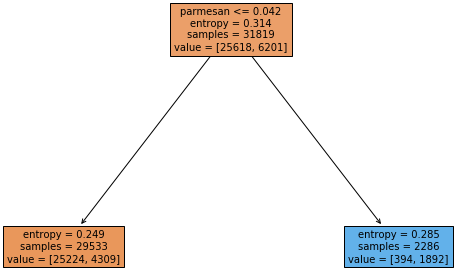

In [110]:
from tree_plotting import plot_tree

plot_tree(dtc, feature_names=vectorizer.get_feature_names(), filled=True)

According to this, classifying a recipe as Italian or not based on whether parmesan is an ingredient gives you 85% accuracy! Let's do a grid search over tree depth to see if increasing it gives us an improvement in accuracy...

In [111]:
param_grid = {'max_depth':  [1,2,3,4,5,6,7,8,9,10,15,20]}

grid = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5,
                    verbose=2,n_jobs=4,return_train_score=True)
grid.fit(X_train_it,y_train_it)

print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    7.6s finished


{'max_depth': 8}
0.8723089977686288


Ok, a max depth of 8 leads to the best cross-validated score

In [112]:
dtc = DecisionTreeClassifier(max_depth=8)
dtc.fit(X_train_it,y_train_it)

print('Accuracy on training data: ',dtc.score(X_train_it,y_train_it))
print('Accuracy on test data: ',dtc.score(X_test_it,y_test_it))

y_pred_it = dtc.predict(X_test_it)

Accuracy on training data:  0.8859486470347905
Accuracy on test data:  0.8740414833438089


['parmesan' 'olive' 'basil' 'cilantro' 'cheese' 'lime' 'cumin' 'onions'
 'dry' 'tortillas']
[64 59  2 23 17 54 32 61 35 89]


[Text(0, 0, 'parmesan'),
 Text(0, 0, 'olive'),
 Text(0, 0, 'basil'),
 Text(0, 0, 'cilantro'),
 Text(0, 0, 'cheese'),
 Text(0, 0, 'lime'),
 Text(0, 0, 'cumin'),
 Text(0, 0, 'onions'),
 Text(0, 0, 'dry'),
 Text(0, 0, 'tortillas')]

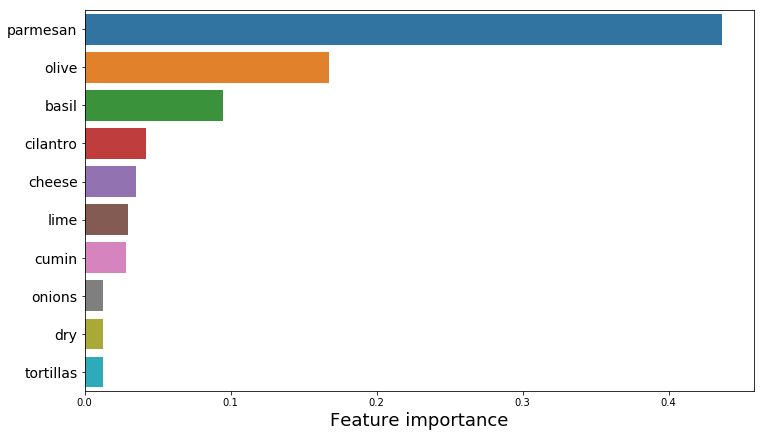

In [142]:
ind = np.argsort(dtc.feature_importances_)[::-1][0:10]
feature_names = np.array(vectorizer.get_feature_names())
feature_importances = dtc.feature_importances_

print(feature_names[ind])
print(ind)

fig,ax = plt.subplots(figsize=(12,7))
sns.barplot(y = feature_names[ind], x = feature_importances[ind])
ax.set_ylabel('')
ax.set_xlabel('Feature importance',fontsize=18)
ax.set_yticklabels(labels=feature_names[ind],fontsize=14)


Would this also work well to identify other cuisines, like Mexican?

In [143]:
df['is_mexican'] = np.nan
for ind, cuisine in enumerate(df.cuisine):
    if cuisine=='mexican':
        df.loc[ind,'is_mexican'] = 1
    else:
        df.loc[ind,'is_mexican'] = 0
        
corpus = []
for ingredients in df.ingredients:
    ing_list = ''
    for ingredient in ingredients:
        ing_list = ing_list + ingredient + ' '
    corpus.append(ing_list)

vectorizer = TfidfVectorizer(max_features=100,max_df=0.5)
X_mx = vectorizer.fit_transform(corpus)
X_mx = X_mx.toarray()
print(vectorizer.get_feature_names())

y_mx = df['is_mexican'].values

print(X_mx.shape,y_mx.shape)

['all', 'baking', 'basil', 'bay', 'beans', 'beef', 'bell', 'black', 'boneless', 'bread', 'breasts', 'broth', 'brown', 'butter', 'carrots', 'cayenne', 'celery', 'cheese', 'chicken', 'chile', 'chili', 'chilies', 'chopped', 'cilantro', 'cinnamon', 'cloves', 'coconut', 'cooking', 'coriander', 'corn', 'cream', 'crushed', 'cumin', 'diced', 'dried', 'dry', 'egg', 'eggs', 'extra', 'fat', 'flakes', 'flour', 'fresh', 'garlic', 'ginger', 'grated', 'green', 'ground', 'juice', 'kosher', 'large', 'leaf', 'leaves', 'lemon', 'lime', 'low', 'milk', 'minced', 'mushrooms', 'olive', 'onion', 'onions', 'oregano', 'paprika', 'parmesan', 'parsley', 'paste', 'pepper', 'pork', 'potatoes', 'powder', 'purpose', 'red', 'rice', 'sauce', 'seasoning', 'seeds', 'sesame', 'shredded', 'shrimp', 'skinless', 'sodium', 'sour', 'soy', 'spray', 'sugar', 'thyme', 'tomato', 'tomatoes', 'tortillas', 'unsalted', 'vanilla', 'vegetable', 'vinegar', 'virgin', 'water', 'white', 'whole', 'wine', 'yellow']
(39774, 100) (39774,)


In [144]:
X_train_mx, X_test_mx, y_train_mx, y_test_mx = train_test_split(X_mx, y_mx, test_size = 0.2)
print(X_train_mx.shape,y_train_mx.shape)
print(X_test_mx.shape,y_test_mx.shape)

dtc = DecisionTreeClassifier(max_depth=1)
dtc.fit(X_train_mx,y_train_mx)

print('Accuracy on training data: ',dtc.score(X_train_mx,y_train_mx))
print('Accuracy on test data: ',dtc.score(X_test_mx,y_test_mx))

y_pred_mx = dtc.predict(X_test_mx)

(31819, 100) (31819,)
(7955, 100) (7955,)
Accuracy on training data:  0.8896256953392627
Accuracy on test data:  0.8877435575109994


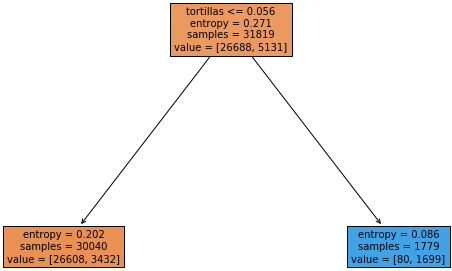

In [145]:
plot_tree(dtc, feature_names=vectorizer.get_feature_names(), filled=True)

I can identify Mexican recipes with 89% accuracy by whether or not there are tortillas in the recipe!

In [146]:
dtc = DecisionTreeClassifier(max_depth=8)
dtc.fit(X_train_mx,y_train_mx)

print('Accuracy on training data: ',dtc.score(X_train_mx,y_train_mx))
print('Accuracy on test data: ',dtc.score(X_test_mx,y_test_mx))

y_pred_mx = dtc.predict(X_test_mx)

Accuracy on training data:  0.9329960086740626
Accuracy on test data:  0.9229415461973601


['tortillas' 'cilantro' 'ginger' 'cheese' 'oregano' 'cumin' 'sugar' 'lime'
 'sauce' 'chilies']
[89 23 44 17 62 32 85 54 74 21]


[Text(0, 0, 'tortillas'),
 Text(0, 0, 'cilantro'),
 Text(0, 0, 'ginger'),
 Text(0, 0, 'cheese'),
 Text(0, 0, 'oregano'),
 Text(0, 0, 'cumin'),
 Text(0, 0, 'sugar'),
 Text(0, 0, 'lime'),
 Text(0, 0, 'sauce'),
 Text(0, 0, 'chilies')]

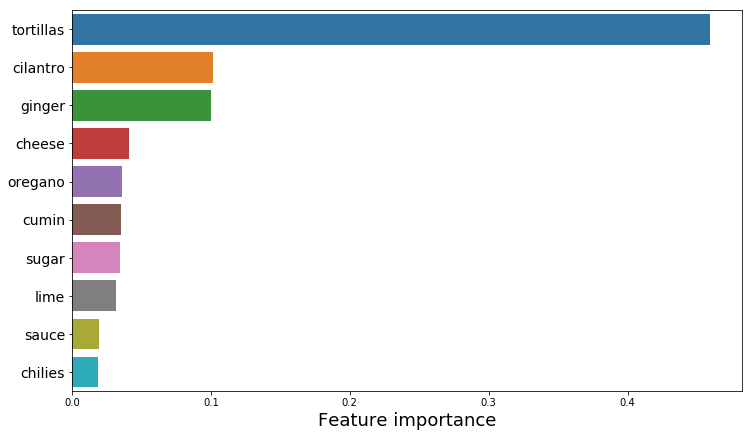

In [147]:
ind = np.argsort(dtc.feature_importances_)[::-1][0:10]
feature_names = np.array(vectorizer.get_feature_names())
feature_importances = dtc.feature_importances_

print(feature_names[ind])
print(ind)

fig,ax = plt.subplots(figsize=(12,7))
sns.barplot(y = feature_names[ind], x = feature_importances[ind])
ax.set_ylabel('')
ax.set_xlabel('Feature importance',fontsize=18)
ax.set_yticklabels(labels=feature_names[ind],fontsize=14)


I can get up to 92% accuracy on Mexican dishes given a decision tree of depth 8. Apparently Mexican food is easier to identify than Italian food!